# UV map
- nii to vtk
    - nii2mesh
- vtk to obj
    - https://imagetostl.com/convert/file/vtk/to/obj
- UV map is computed from UV-mapper
    - https://www.uvmapper.com/downloads.html

# TODO
- 양쪽 해마 합치기

- Vertex 및 Face 합치기


# Common Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go
import nibabel as nb
from glob import glob

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")
sys.path.append("/home/seojin/Seojin_commonTool/Module/Brain_Surface/")

from plot_3d import draw_uv_map, show_non_interactive_mesh, show_mesh
from brain_mesh import show_stat_onUV, load_mesh, show_interactive_mesh, show_components, component_mesh_info
from sj_matplotlib import get_color
from surface_analysis import surface_profile_onUV
from brain_mesh import inverse_component_mesh_info

# Constants

In [72]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask"

lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus_more.obj")
lt_hippo_uv_path = os.path.join(mask_dir_path, "lt_hippocampus_more_afterUVmap_planarZ.obj")

rt_hippo_path = os.path.join(mask_dir_path, "rt_hippocampus.obj")
rt_hippo_uv_path = os.path.join(mask_dir_path, "rt_hippocampus_afterUVmap_planarZ.obj")

from_point = np.array([0.25, 0.1]) 
to_point = np.array([0.25, 1])

# Load Data

In [73]:
# Vertex & Faces
lt_hippo_mesh_info = load_mesh(lt_hippo_path)
lt_hippo_uv_mesh_info = load_mesh(lt_hippo_uv_path, type_ = "uv")

rt_hippo_mesh_info = load_mesh(rt_hippo_path)
rt_hippo_uv_mesh_info = load_mesh(rt_hippo_uv_path, type_ = "uv")

# Data
data_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/Group/rsa/rdm/set/WholeSet/base_seqOnly/None/pattern_separation"
data_paths = sorted(glob(os.path.join(data_dir_path, "WholeSet_HP*")))

# Orientation

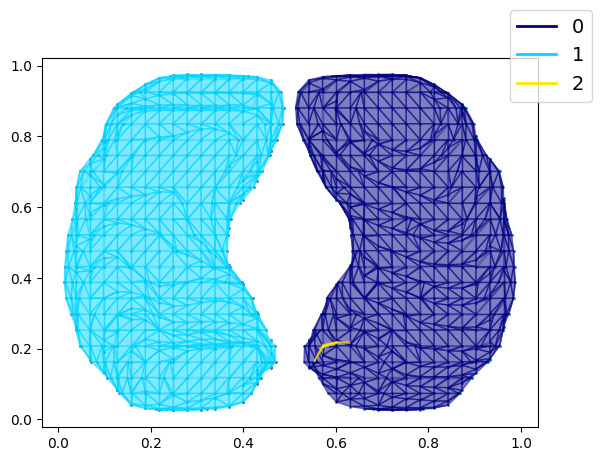

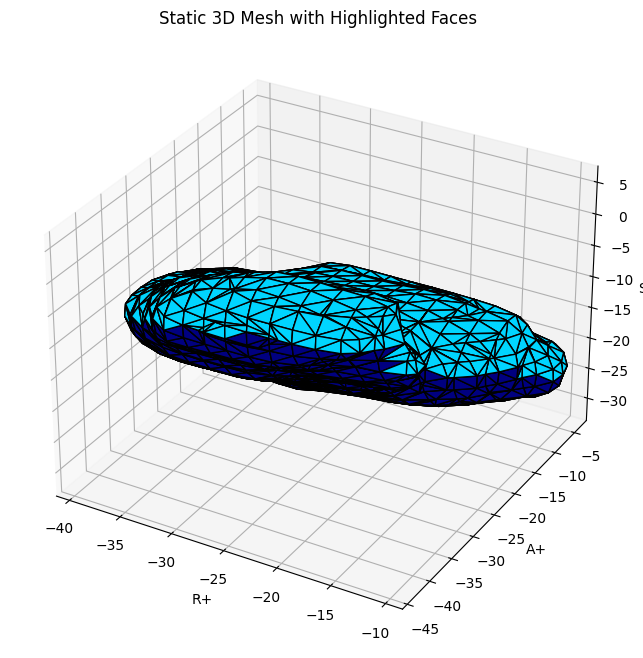

In [74]:
lt_face_components, (_, _) = show_components(lt_hippo_mesh_info, lt_hippo_uv_mesh_info)

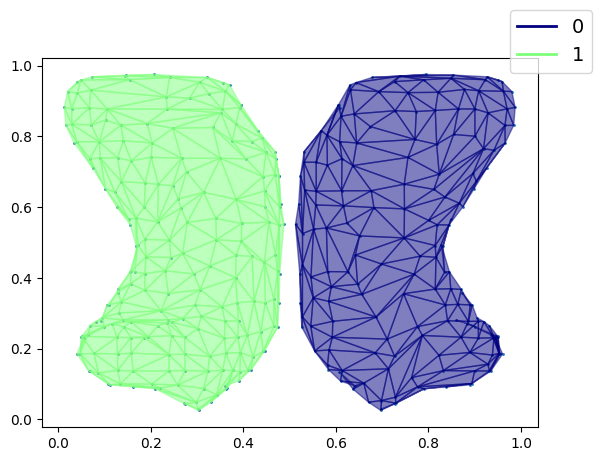

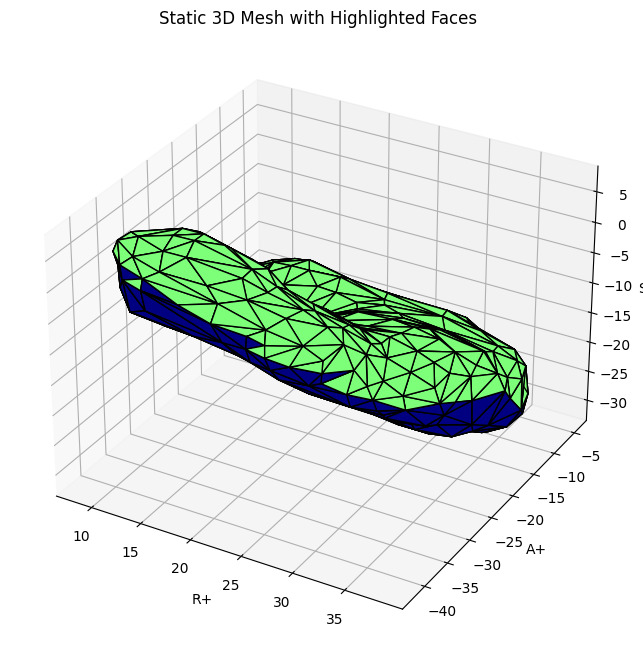

In [75]:
rt_face_components, (_, _) = show_components(rt_hippo_mesh_info, rt_hippo_uv_mesh_info)

# Remain superior only

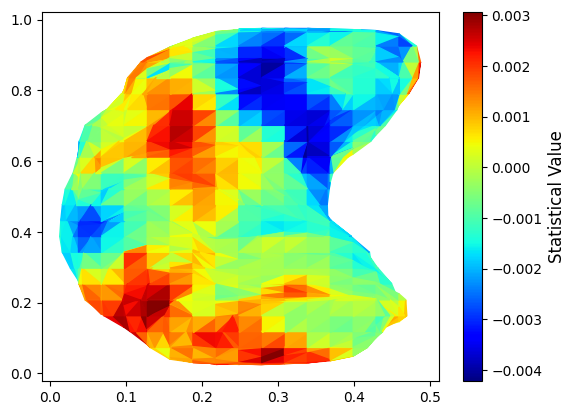

In [76]:
lt_superior_mesh_info = component_mesh_info(lt_hippo_uv_mesh_info, lt_face_components[1])
fig, axis = show_stat_onUV(vertices = lt_superior_mesh_info["vertex"], 
                           uv_coordinates = lt_superior_mesh_info["uv"],
                           faces = lt_superior_mesh_info["face"],
                           stat_path = data_paths[0])

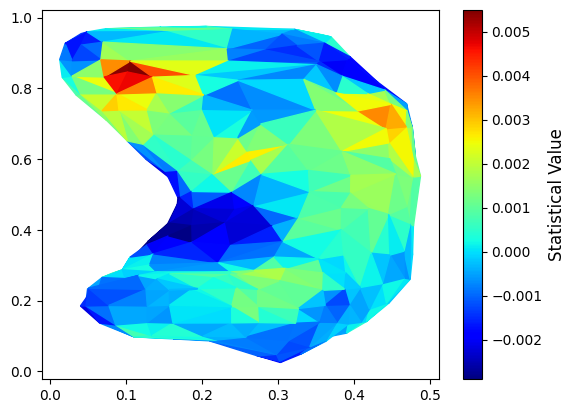

In [77]:
rt_superior_mesh_info = component_mesh_info(rt_hippo_uv_mesh_info, rt_face_components[1])
fig, axis = show_stat_onUV(vertices = rt_superior_mesh_info["vertex"], 
                           uv_coordinates = rt_superior_mesh_info["uv"],
                           faces = rt_superior_mesh_info["face"],
                           stat_path = data_paths[0])

# Coverage

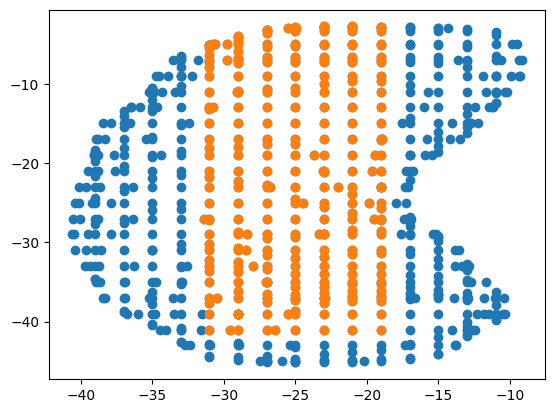

In [78]:
lt_profile_result_info = surface_profile_onUV(data_paths = data_paths, 
                                    vertices = lt_superior_mesh_info["vertex"],
                                    uv_coordinates = lt_superior_mesh_info["uv"], 
                                    from_point = from_point, 
                                    to_point = to_point, 
                                    n_sampling = 10, 
                                    width = 0.1)
lt_virtual_strip_virticies = lt_superior_mesh_info["vertex"][lt_profile_result_info["virtual_strip_mask"]]

plt.scatter(lt_superior_mesh_info["vertex"][:, 0], lt_superior_mesh_info["vertex"][:, 1])
plt.scatter(lt_virtual_strip_virticies[:, 0], lt_virtual_strip_virticies[:, 1])

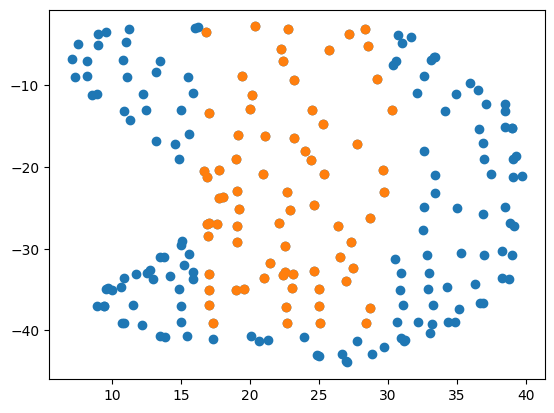

In [79]:
rt_profile_result_info = surface_profile_onUV(data_paths = data_paths, 
                                              vertices = rt_superior_mesh_info["vertex"],
                                              uv_coordinates = rt_superior_mesh_info["uv"], 
                                              from_point = from_point, 
                                              to_point = to_point, 
                                              n_sampling = 10, 
                                              width = 0.1)
rt_virtual_strip_virticies = rt_superior_mesh_info["vertex"][rt_profile_result_info["virtual_strip_mask"]]

plt.scatter(rt_superior_mesh_info["vertex"][:, 0], rt_superior_mesh_info["vertex"][:, 1])
plt.scatter(rt_virtual_strip_virticies[:, 0], rt_virtual_strip_virticies[:, 1])

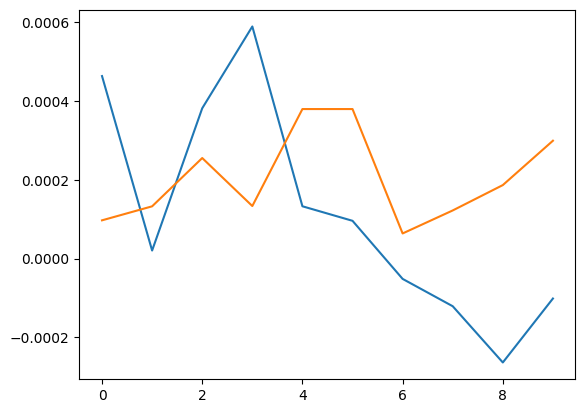

In [80]:
plt.plot(np.mean(lt_profile_result_info["sampling_datas"], axis = 0))
plt.plot(np.mean(rt_profile_result_info["sampling_datas"], axis = 0))

# Virtual strip

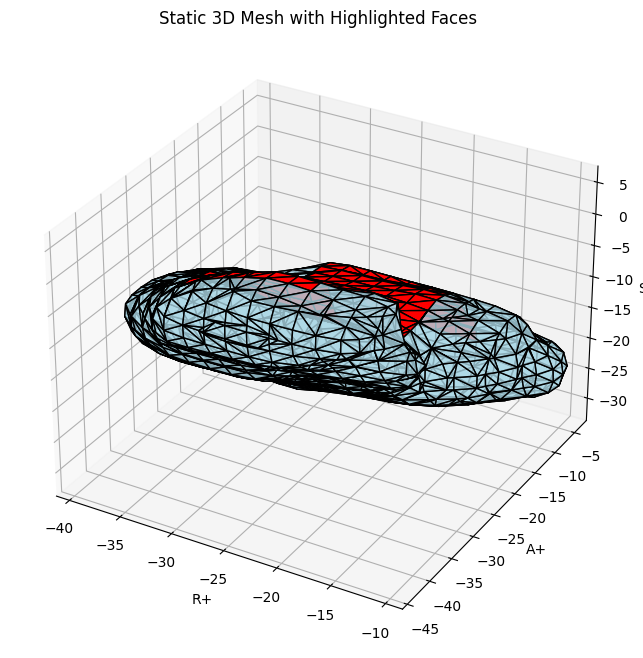

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Static 3D Mesh with Highlighted Faces'}, xlabel='R+', ylabel='A+', zlabel='S+'>)

In [81]:
lt_highlight_vertex_indices = inverse_component_mesh_info(lt_superior_mesh_info["mapping_ori2conv"], 
                                                          mask_basedOn_component = lt_profile_result_info["virtual_strip_mask"])

show_mesh(lt_hippo_uv_mesh_info["vertex"], 
          faces = lt_hippo_uv_mesh_info["face"],
          vertex_index_info = {
              "a" : {
                  "color" : "red",
                  "set" : lt_highlight_vertex_indices,
              }
          })

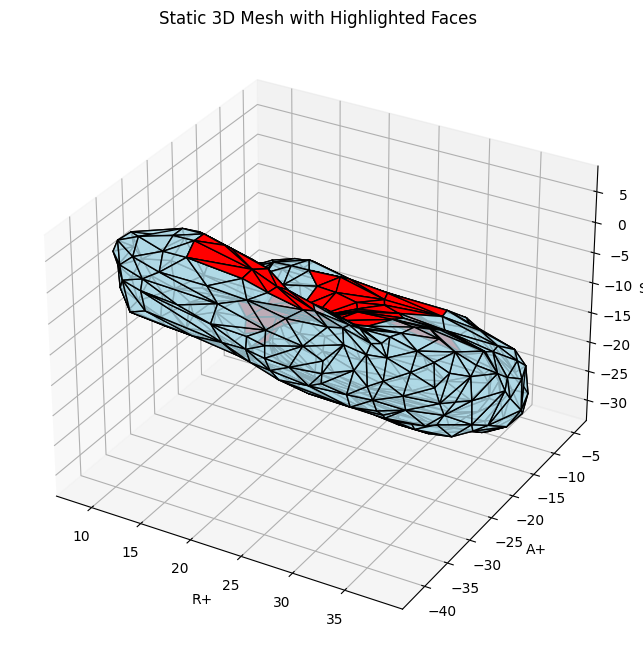

(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'Static 3D Mesh with Highlighted Faces'}, xlabel='R+', ylabel='A+', zlabel='S+'>)

In [82]:
rt_highlight_vertex_indices = inverse_component_mesh_info(rt_superior_mesh_info["mapping_ori2conv"], 
                                                          mask_basedOn_component = rt_profile_result_info["virtual_strip_mask"])

show_mesh(rt_hippo_uv_mesh_info["vertex"], 
          faces = rt_hippo_uv_mesh_info["face"],
          vertex_index_info = {
              "a" : {
                  "color" : "red",
                  "set" : rt_highlight_vertex_indices,
              }
          })

In [83]:
is_highlight_face = np.alltrue(np.isin(lt_hippo_uv_mesh_info["face"], lt_highlight_vertex_indices), axis = 1)
is_highlight_face_indices = np.where(is_highlight_face)[0]
show_interactive_mesh(vertices = lt_hippo_uv_mesh_info["vertex"],
                      faces = lt_hippo_uv_mesh_info["face"],
                      highlight_face_info = {
                          "name" : {
                              "color" : "red",
                              "data" : is_highlight_face_indices,
                          }
                      })

In [84]:
is_highlight_face = np.alltrue(np.isin(rt_hippo_uv_mesh_info["face"], rt_highlight_vertex_indices), axis = 1)
is_highlight_face_indices = np.where(is_highlight_face)[0]
show_interactive_mesh(vertices = rt_hippo_uv_mesh_info["vertex"],
                      faces = rt_hippo_uv_mesh_info["face"],
                      highlight_face_info = {
                          "name" : {
                              "color" : "red",
                              "data" : is_highlight_face_indices,
                          }
                      })